In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")

C:\Users\84362\AppData\Local\Temp\ipykernel_11288\871061281.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")


Features that I am going to use are Age Group, Year, Month, State, Sex, and COVID-19 Deaths. Age Group, Year, Month, State, and Sex will be the predictors, and COVID-19 Deaths will be the response. The reason why I choose these features because I have heard that elder people have a higher death rate than younger people after being infected by the covid. So I want to find out the relationship between the death rate of COVID-19 and individual's condition. 

The group column has repeated data, and I want to group up the time by month, so I will delete all of the By Total and By Year rows. I will do the same thing to State, Sex, and Age Group columns as well for the same reason. I will also get rid of all other columns and only keep the columns of features that I choose.

In [3]:
df = df[df["Group"].str.contains("By Total") == False]
df = df[df["Group"].str.contains("By Year") == False]
df = df[df["State"].str.contains("United States") == False]
df = df[df["Sex"].str.contains("All Sexes") == False]
df = df[df["Age Group"].str.contains("All Ages") == False]
df = df.drop('Data As Of', axis=1)
df = df.drop('Start Date', axis=1)
df = df.drop('End Date', axis=1)
df = df.drop('Total Deaths', axis=1)
df = df.drop('Pneumonia Deaths', axis=1)
df = df.drop('Pneumonia and COVID-19 Deaths', axis=1)
df = df.drop('Influenza Deaths', axis=1)
df = df.drop('Pneumonia, Influenza, or COVID-19 Deaths', axis=1)
df = df.drop('Footnote', axis=1)

<AxesSubplot:>

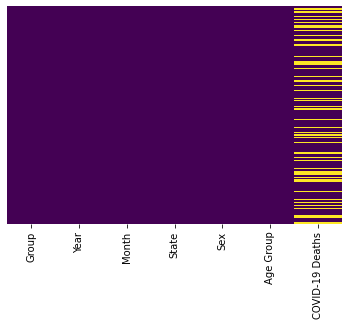

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are many missing values in the COVID-19 Deaths columns. According to the footnote, missing values have counts between 1 to 9, and they are missing because of the NCHS confidentiality standards. I cannot delete them since they are not missing at random. I will replace the missing values with Median, which is 5.

In [5]:
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].fillna(5)

To find the outliers, I need to delete all the comma in COVID-19 Deaths column.

In [6]:
df = df.replace(',','', regex=True)

In [7]:
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].astype('int')

<AxesSubplot:>

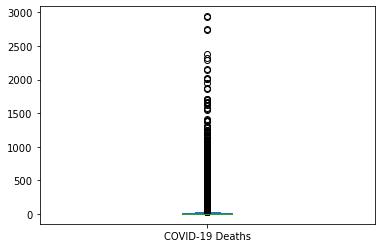

In [8]:
df['COVID-19 Deaths'].plot.box()

As the graph shown, most of the data from COVID-19 Deaths are 0, but there are also numerous of data that are greater than 0, so I won't consider them as outliers. The only two outliers are the two dot above 2500. I will keep the two outliers because they are not data errors but real recorded data.

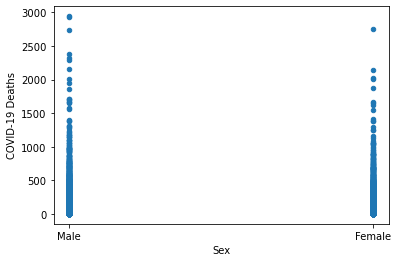

In [9]:
ax1 = df.plot.scatter(x='Sex', y='COVID-19 Deaths')

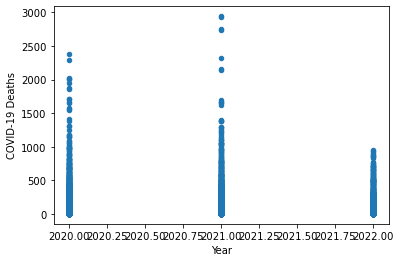

In [10]:
ax2 = df.plot.scatter(x='Year', y='COVID-19 Deaths')

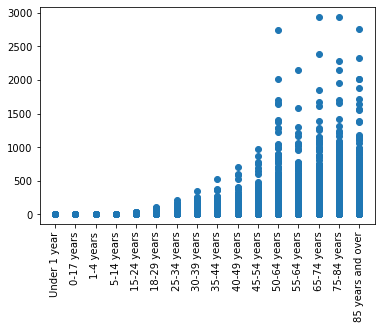

In [11]:
plt.scatter(df['Age Group'], df['COVID-19 Deaths'])
plt.xticks(rotation=90)
plt.show()

In [12]:
df["COVID-19 Deaths"] = df["COVID-19 Deaths"].astype('int')

Since all states have different population, state with greater population will more likely to have greater number of COVID-19 death. For example, California, the state that has the greatest population, will have more COVID-19 death number compared to Wyoming, the state that has the lowest population, while the rate of death may not have a large difference. In order to calculate the death rate, I will divided the COVID-19 Death by the number of population for each state.

In [13]:
df['COVID-19 Death Rate'] = df['COVID-19 Deaths']
df['COVID-19 Death Rate'][df['State'] == 'Alabama'] = df['COVID-19 Death Rate'][df['State'] == 'Alabama']/5024279
df['COVID-19 Death Rate'][df['State'] == 'Alaska'] = df['COVID-19 Death Rate'][df['State'] == 'Alaska']/733391
df['COVID-19 Death Rate'][df['State'] == 'Arizona'] = df['COVID-19 Death Rate'][df['State'] == 'Arizona']/7151502
df['COVID-19 Death Rate'][df['State'] == 'Arkansas'] = df['COVID-19 Death Rate'][df['State'] == 'Arkansas']/3011524
df['COVID-19 Death Rate'][df['State'] == 'California'] = df['COVID-19 Death Rate'][df['State'] == 'California']/39538223
df['COVID-19 Death Rate'][df['State'] == 'Colorado'] = df['COVID-19 Death Rate'][df['State'] == 'Colorado']/5773714
df['COVID-19 Death Rate'][df['State'] == 'Connecticut'] = df['COVID-19 Death Rate'][df['State'] == 'Connecticut']/3605944
df['COVID-19 Death Rate'][df['State'] == 'Delaware'] = df['COVID-19 Death Rate'][df['State'] == 'Delaware']/989948
df['COVID-19 Death Rate'][df['State'] == 'District of Columbia'] = df['COVID-19 Death Rate'][df['State'] == 'District of Columbia']/701974
df['COVID-19 Death Rate'][df['State'] == 'Florida'] = df['COVID-19 Death Rate'][df['State'] == 'Florida']/21538187
df['COVID-19 Death Rate'][df['State'] == 'Georgia'] = df['COVID-19 Death Rate'][df['State'] == 'Georgia']/10711908
df['COVID-19 Death Rate'][df['State'] == 'Hawaii'] = df['COVID-19 Death Rate'][df['State'] == 'Hawaii']/1455271
df['COVID-19 Death Rate'][df['State'] == 'Idaho'] = df['COVID-19 Death Rate'][df['State'] == 'Idaho']/1839106
df['COVID-19 Death Rate'][df['State'] == 'Illinois'] = df['COVID-19 Death Rate'][df['State'] == 'Illinois']/12812508
df['COVID-19 Death Rate'][df['State'] == 'Indiana'] = df['COVID-19 Death Rate'][df['State'] == 'Indiana']/6785528
df['COVID-19 Death Rate'][df['State'] == 'Iowa'] = df['COVID-19 Death Rate'][df['State'] == 'Iowa']/3190369
df['COVID-19 Death Rate'][df['State'] == 'Kansas'] = df['COVID-19 Death Rate'][df['State'] == 'Kansas']/2937880
df['COVID-19 Death Rate'][df['State'] == 'Kentucky'] = df['COVID-19 Death Rate'][df['State'] == 'Kentucky']/4505836
df['COVID-19 Death Rate'][df['State'] == 'Louisiana'] = df['COVID-19 Death Rate'][df['State'] == 'Louisiana']/4657757
df['COVID-19 Death Rate'][df['State'] == 'Maine'] = df['COVID-19 Death Rate'][df['State'] == 'Maine']/1362359
df['COVID-19 Death Rate'][df['State'] == 'Maryland'] = df['COVID-19 Death Rate'][df['State'] == 'Maryland']/6177224
df['COVID-19 Death Rate'][df['State'] == 'Massachusetts'] = df['COVID-19 Death Rate'][df['State'] == 'Massachusetts']/7029917
df['COVID-19 Death Rate'][df['State'] == 'Michigan'] = df['COVID-19 Death Rate'][df['State'] == 'Michigan']/10077331
df['COVID-19 Death Rate'][df['State'] == 'Minnesota'] = df['COVID-19 Death Rate'][df['State'] == 'Minnesota']/5706494
df['COVID-19 Death Rate'][df['State'] == 'Mississippi'] = df['COVID-19 Death Rate'][df['State'] == 'Mississippi']/2961279
df['COVID-19 Death Rate'][df['State'] == 'Missouri'] = df['COVID-19 Death Rate'][df['State'] == 'Missouri']/6154913
df['COVID-19 Death Rate'][df['State'] == 'Montana'] = df['COVID-19 Death Rate'][df['State'] == 'Montana']/1084225
df['COVID-19 Death Rate'][df['State'] == 'Nebraska'] = df['COVID-19 Death Rate'][df['State'] == 'Nebraska']/1961504
df['COVID-19 Death Rate'][df['State'] == 'Nevada'] = df['COVID-19 Death Rate'][df['State'] == 'Nevada']/3104614
df['COVID-19 Death Rate'][df['State'] == 'New Hampshire'] = df['COVID-19 Death Rate'][df['State'] == 'New Hampshire']/1377529
df['COVID-19 Death Rate'][df['State'] == 'New Jersey'] = df['COVID-19 Death Rate'][df['State'] == 'New Jersey']/9288994
df['COVID-19 Death Rate'][df['State'] == 'New Mexico'] = df['COVID-19 Death Rate'][df['State'] == 'New Mexico']/2117522
df['COVID-19 Death Rate'][df['State'] == 'New York'] = df['COVID-19 Death Rate'][df['State'] == 'New York']/20201249
df['COVID-19 Death Rate'][df['State'] == 'New York City'] = df['COVID-19 Death Rate'][df['State'] == 'New York City']/8467513
df['COVID-19 Death Rate'][df['State'] == 'North Carolina'] = df['COVID-19 Death Rate'][df['State'] == 'North Carolina']/10439388
df['COVID-19 Death Rate'][df['State'] == 'North Dakota'] = df['COVID-19 Death Rate'][df['State'] == 'North Dakota']/779094
df['COVID-19 Death Rate'][df['State'] == 'Ohio'] = df['COVID-19 Death Rate'][df['State'] == 'Ohio']/11799448
df['COVID-19 Death Rate'][df['State'] == 'Oklahoma'] = df['COVID-19 Death Rate'][df['State'] == 'Oklahoma']/3959353
df['COVID-19 Death Rate'][df['State'] == 'Oregon'] = df['COVID-19 Death Rate'][df['State'] == 'Oregon']/4237256
df['COVID-19 Death Rate'][df['State'] == 'Pennsylvania'] = df['COVID-19 Death Rate'][df['State'] == 'Pennsylvania']/13002700
df['COVID-19 Death Rate'][df['State'] == 'Rhode Island'] = df['COVID-19 Death Rate'][df['State'] == 'Rhode Island']/1097379
df['COVID-19 Death Rate'][df['State'] == 'South Carolina'] = df['COVID-19 Death Rate'][df['State'] == 'South Carolina']/5118425
df['COVID-19 Death Rate'][df['State'] == 'South Dakota'] = df['COVID-19 Death Rate'][df['State'] == 'South Dakota']/886667
df['COVID-19 Death Rate'][df['State'] == 'Tennessee'] = df['COVID-19 Death Rate'][df['State'] == 'Tennessee']/6910840
df['COVID-19 Death Rate'][df['State'] == 'Texas'] = df['COVID-19 Death Rate'][df['State'] == 'Texas']/29145505
df['COVID-19 Death Rate'][df['State'] == 'Utah'] = df['COVID-19 Death Rate'][df['State'] == 'Utah']/6271616
df['COVID-19 Death Rate'][df['State'] == 'Vermont'] = df['COVID-19 Death Rate'][df['State'] == 'Vermont']/643077
df['COVID-19 Death Rate'][df['State'] == 'Virginia'] = df['COVID-19 Death Rate'][df['State'] == 'Virginia']/8631393
df['COVID-19 Death Rate'][df['State'] == 'Washington'] = df['COVID-19 Death Rate'][df['State'] == 'Washington']/7705281
df['COVID-19 Death Rate'][df['State'] == 'West Virginia'] = df['COVID-19 Death Rate'][df['State'] == 'West Virginia']/1793716
df['COVID-19 Death Rate'][df['State'] == 'Wisconsin'] = df['COVID-19 Death Rate'][df['State'] == 'Wisconsin']/5893718
df['COVID-19 Death Rate'][df['State'] == 'Wyoming'] = df['COVID-19 Death Rate'][df['State'] == 'Wyoming']/576851
df['COVID-19 Death Rate'][df['State'] == 'Puerto Rico'] = df['COVID-19 Death Rate'][df['State'] == 'Puerto Rico']/3271564

C:\Users\84362\AppData\Local\Temp\ipykernel_11288\771200196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COVID-19 Death Rate'][df['State'] == 'Alabama'] = df['COVID-19 Death Rate'][df['State'] == 'Alabama']/5024279
C:\Users\84362\AppData\Local\Temp\ipykernel_11288\771200196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COVID-19 Death Rate'][df['State'] == 'Alaska'] = df['COVID-19 Death Rate'][df['State'] == 'Alaska']/733391
C:\Users\84362\AppData\Local\Temp\ipykernel_11288\771200196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

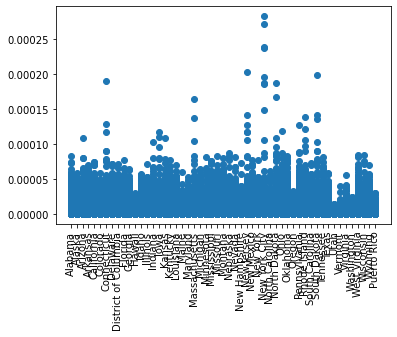

In [14]:
plt.scatter(df['State'], df['COVID-19 Death Rate'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Density'>

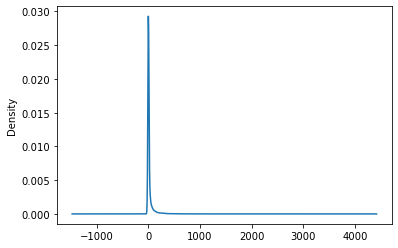

In [15]:
df['COVID-19 Deaths'].plot.density()

<AxesSubplot:>

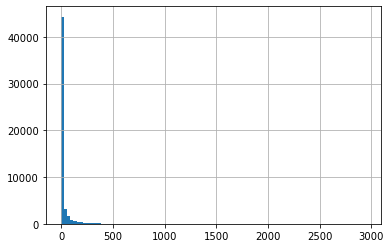

In [16]:
df['COVID-19 Deaths'].hist(bins=100)

There is no need to center, scale, or transform the data.

In [17]:
df.sort_values(by=['COVID-19 Deaths'])

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,COVID-19 Death Rate
12615,By Month,2020.0,1.0,Alabama,Male,Under 1 year,0,0.000000
41755,By Month,2021.0,2.0,Louisiana,Female,1-4 years,0,0.000000
41754,By Month,2021.0,2.0,Louisiana,Female,0-17 years,0,0.000000
41753,By Month,2021.0,2.0,Louisiana,Female,Under 1 year,0,0.000000
73883,By Month,2021.0,12.0,Oregon,Female,Under 1 year,0,0.000000
...,...,...,...,...,...,...,...,...
64954,By Month,2020.0,4.0,New York City,Male,65-74 years,2388,0.000282
19562,By Month,2021.0,1.0,California,Male,50-64 years,2739,0.000069
19583,By Month,2021.0,1.0,California,Female,85 years and over,2756,0.000070
19564,By Month,2021.0,1.0,California,Male,65-74 years,2939,0.000074


I will categorize the State column by their rank of health care. The top half on the best states for health care list (states that have good health care) will be 0, and the rest will be 1.

In [18]:
df.loc[df['State'].str.contains('Hawaii'), 'State'] = '0'
df.loc[df['State'].str.contains('Massachusetts'), 'State'] = '0'
df.loc[df['State'].str.contains('Connecticut'), 'State'] = '0'
df.loc[df['State'].str.contains('New Jersey'), 'State'] = '0'
df.loc[df['State'].str.contains('California'), 'State'] = '0'
df.loc[df['State'].str.contains('Maryland'), 'State'] = '0'
df.loc[df['State'].str.contains('New York'), 'State'] = '0'
df.loc[df['State'].str.contains('Washington'), 'State'] = '0'
df.loc[df['State'].str.contains('Rhode Island'), 'State'] = '0'
df.loc[df['State'].str.contains('Colorado'), 'State'] = '0'
df.loc[df['State'].str.contains('Utah'), 'State'] = '0'
df.loc[df['State'].str.contains('Virginia'), 'State'] = '0'
df.loc[df['State'].str.contains('New Hampshire'), 'State'] = '0'
df.loc[df['State'].str.contains('Delaware'), 'State'] = '0'
df.loc[df['State'].str.contains('Wisconsin'), 'State'] = '0'
df.loc[df['State'].str.contains('Minnesota'), 'State'] = '0'
df.loc[df['State'].str.contains('Oregon'), 'State'] = '0'
df.loc[df['State'].str.contains('Vermont'), 'State'] = '0'
df.loc[df['State'].str.contains('Pennsylvania'), 'State'] = '0'
df.loc[df['State'].str.contains('Iowa'), 'State'] = '0'
df.loc[df['State'].str.contains('Arizona'), 'State'] = '0'

In [19]:
df.loc[df['State'].str.isalpha(), 'State'] = '1'
df.loc[df['State'].str.contains(' '), 'State'] = '1'

I will categorize the time by the releasing date of COVID-19 vaccine. The vaccine came out on August 23, 2021. Since it came out on late August, I will set all time before September, 2021 as 0, which means no vaccine, and after September, 2021 as 1, which means vaccine was released. To do so, I must combine the Year and Month columns first.

In [20]:
df["Year"] = df["Year"].astype('str')
df["Month"] = df["Month"].astype('str')
df['Time'] = df[['Year', 'Month']].apply(".".join, axis=1)

In [21]:
df.loc[df['Time'].str.contains('2020'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.1.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.2.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.3.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.4.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.5.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.6.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.7.0'), 'Time'] = '0'
df.loc[df['Time'].str.contains('2021.0.8.0'), 'Time'] = '0'

In [22]:
df.loc[df['Time'].str.contains('.0'), 'Time'] = '1'

I will categorize the Sex column by gender. Males will be 0 and females will be 1.

In [23]:
df.loc[df['Sex'].str.contains('Male'), 'Sex'] = '0'
df.loc[df['Sex'].str.contains('Female'), 'Sex'] = '1'

I will categorize the Age Group column by young and old. I will set under 1 year to 30-39 years as 0, which means young, and 35-44 years to 85 years and over as 1, which means old.

In [24]:
df.loc[df['Age Group'].str.contains('Under 1 year'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('0-17 years'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('1-4 years'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('5-14 years'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('15-24 years'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('18-29 years'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('25-34 years'), 'Age Group'] = '0'
df.loc[df['Age Group'].str.contains('30-39 years'), 'Age Group'] = '0'

In [25]:
df.loc[df['Age Group'].str.contains('years'), 'Age Group'] = '1'

Now I will get rid of all other columns and only leave my predictors and reponse features.

In [26]:
df = df.drop('Group', axis=1)
df = df.drop('Year', axis=1)
df = df.drop('Month', axis=1)

In [27]:
df["State"] = df["State"].astype('float')
df["Sex"] = df["Sex"].astype('float')
df["Age Group"] = df["Age Group"].astype('float')
df["Time"] = df["Time"].astype('float')
df.dtypes

State                  float64
Sex                    float64
Age Group              float64
COVID-19 Deaths          int32
COVID-19 Death Rate    float64
Time                   float64
dtype: object

In [28]:
def label_encode(df,columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fittted = le.fit(col_values_unique)
        col_values = list(df[col].values)
        col_values_transformed = le.transform(col_values)
        df[col]=col_values_transformed

## Random Forest that Predict the COVID-19 Death Rate

In [29]:
X = df[['State', 'Sex', 'Age Group', 'Time']]
label_encode(X,X.columns.values)
y = df[['COVID-19 Death Rate']]
label_encode(y,y.columns.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\84362\AppData\Local\Temp\ipykernel_11288\1806294218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=col_values_transformed
C:\Users\84362\AppData\Local\Temp\ipykernel_11288\1806294218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=col_values_transformed


In [30]:
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X_train, y_train)

C:\Users\84362\AppData\Local\Temp\ipykernel_11288\715253005.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=1)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

Index(['State', 'Sex', 'Age Group', 'Time'], dtype='object')
[0.02721891 0.00631352 0.94856    0.01790757]


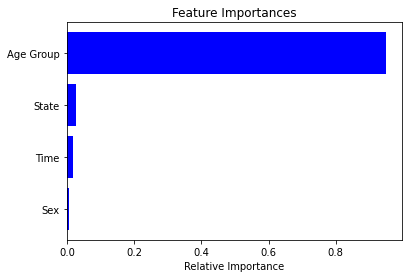

In [33]:
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
print(metrics.accuracy_score(y_test, y_pred))

0.4330543933054393


## Random Forest that Predict the COVID-19 Deaths

In [35]:
x = df[['State', 'Sex', 'Age Group', 'Time']]
label_encode(x,x.columns.values)
Y = df[['COVID-19 Deaths']]
label_encode(Y,Y.columns.values)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=1)

C:\Users\84362\AppData\Local\Temp\ipykernel_11288\1806294218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=col_values_transformed
C:\Users\84362\AppData\Local\Temp\ipykernel_11288\1806294218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=col_values_transformed


In [36]:
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(x_train, Y_train)

C:\Users\84362\AppData\Local\Temp\ipykernel_11288\1773371515.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, Y_train)


RandomForestClassifier(max_depth=10, random_state=1)

In [37]:
Y_pred = model.predict(x_test)
Y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
features = x.columns
print(features)
importances = model.feature_importances_
print(importances)

Index(['State', 'Sex', 'Age Group', 'Time'], dtype='object')
[0.00649498 0.00776454 0.965119   0.02062148]


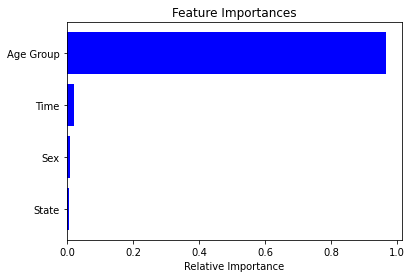

In [39]:
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.5111259033853176


## Decision Tree

In [47]:
model = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [48]:
y_pred_class = model.predict(X_test)
y_pred_class

array([1512.39277389,   75.11221516,   75.11221516, ..., 1512.39277389,
         75.11221516,   75.11221516])

In [53]:
pred_df = pd.concat([df, pd.Series(y_pred_class)], axis=1)
pred_df.tail()

,State,Sex,Age Group,COVID-19 Deaths,COVID-19 Death Rate,Time,0
10511,NaN,NaN,NaN,NaN,NaN,NaN,1512.392774
10512,NaN,NaN,NaN,NaN,NaN,NaN,1512.392774
10513,NaN,NaN,NaN,NaN,NaN,NaN,1512.392774
10514,NaN,NaN,NaN,NaN,NaN,NaN,75.112215
10515,NaN,NaN,NaN,NaN,NaN,NaN,75.112215


In [56]:
pred_df.head()

,State,Sex,Age Group,COVID-19 Deaths,COVID-19 Death Rate,Time,0
12615,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12616,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12617,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12618,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12619,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [57]:
model = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
model.fit(x_train, Y_train)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [58]:
Y_pred_class = model.predict(x_test)
Y_pred_class

array([33.74607379,  0.87092151,  0.87092151, ..., 43.48792271,
        0.87092151,  0.87092151])

In [59]:
pred_df = pd.concat([df, pd.Series(Y_pred_class)], axis=1)
pred_df.tail()

,State,Sex,Age Group,COVID-19 Deaths,COVID-19 Death Rate,Time,0
10511,NaN,NaN,NaN,NaN,NaN,NaN,33.746074
10512,NaN,NaN,NaN,NaN,NaN,NaN,33.746074
10513,NaN,NaN,NaN,NaN,NaN,NaN,43.487923
10514,NaN,NaN,NaN,NaN,NaN,NaN,0.870922
10515,NaN,NaN,NaN,NaN,NaN,NaN,0.870922


In [60]:
pred_df.head()

,State,Sex,Age Group,COVID-19 Deaths,COVID-19 Death Rate,Time,0
12615,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12616,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12617,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12618,1.0,0.0,0.0,0.0,0.0,0.0,NaN
12619,1.0,0.0,0.0,0.0,0.0,0.0,NaN
